In [1]:
import pandas as pd
import numpy as np
import csv
import sklearn
from sklearn.decomposition import TruncatedSVD

In [2]:
%pip install surprise

Note: you may need to restart the kernel to use updated packages.


You are using pip version 10.0.1, however version 22.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
from surprise import SVD

In [4]:
#columns = ['userid', 'movieId', 'rating', 'timestamp']
ratings = pd.read_excel('ratings.xlsx')


In [5]:
movies = pd.read_excel('movies.xlsx')
new_movies = movies['genres'].str.get_dummies(sep='|')
movies.drop('genres',inplace=True,axis=1)
movies=pd.concat([movies, new_movies], axis=1)
movies.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:

ratings = pd.merge(movies, ratings, on='movieId')
ratings.drop('(no genres listed)',inplace=True,axis=1)
ratings.head()

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId,rating,timestamp
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,4.0,964982703
1,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,5,4.0,847434962
2,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,7,4.5,1106635946
3,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,15,2.5,1510577970
4,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,17,4.5,1305696483


In [7]:
ratings.columns

Index(['movieId', 'title', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western', 'userId', 'rating', 'timestamp'],
      dtype='object')

In [8]:
ratings['userId']

0           1
1           5
2           7
3          15
4          17
         ... 
100831    184
100832    184
100833    184
100834    184
100835    331
Name: userId, Length: 100836, dtype: int64

In [9]:
rating_crosstab = ratings.pivot_table(
    values='rating', index='userId', columns='title', fill_value=0)
print(rating_crosstab.head())
X=rating_crosstab.T

title   (500) Days of Summer (2009)  *batteries not included (1987)  \
userId                                                                
1                               0.0                             0.0   
2                               0.0                             0.0   
3                               0.0                             0.0   
4                               0.0                             0.0   
5                               0.0                             0.0   

title   ...All the Marbles (1981)  ...And Justice for All (1979)  \
userId                                                             
1                               0                            0.0   
2                               0                            0.0   
3                               0                            0.0   
4                               0                            0.0   
5                               0                            0.0   

title   00 Schneider - Ja

In [32]:

SVD = TruncatedSVD(n_components=12, random_state=5)
resultant_matrix = SVD.fit_transform(X)
resultant_matrix


array([[ 9.90829915e+00,  7.98315829e+00, -1.76166265e+00, ...,
        -1.27391264e+00,  3.54861244e-01,  7.78247835e-01],
       [ 1.97737033e+00, -2.06998079e-01, -7.27015333e-01, ...,
         6.92159232e-01,  1.22764731e+00, -2.39755850e+00],
       [ 2.61181363e-02, -2.71265542e-02, -2.20109895e-02, ...,
         1.78617120e-02,  1.66468391e-02, -8.17720318e-03],
       ...,
       [ 9.35396233e-01,  9.31461475e-01, -1.28695701e-02, ...,
         5.19442483e-01, -6.62558673e-01,  1.26994339e+00],
       [ 6.50333276e+00, -2.71457157e+00, -2.10297896e+00, ...,
         2.54343383e+00,  1.01857089e+00, -3.88067928e+00],
       [ 3.13533586e-02, -4.36049471e-02,  3.28388568e-03, ...,
         1.77835726e-02,  4.61560493e-02,  2.27055943e-02]])

In [ ]:
print(resultant_matrix.shape)
corr_matrix=np.corrcoef(resultant_matrix)
print(corr_matrix.shape)

In [11]:
from surprise import Reader, Dataset
reader = Reader()

In [12]:
ratings[['userId', 'movieId', 'rating']]

,userId,movieId,rating
0,1,1,4.0
1,5,1,4.0
2,7,1,4.5
3,15,1,2.5
4,17,1,4.5
...,...,...,...
100831,184,193581,4.0
100832,184,193583,3.5
100833,184,193585,3.5
100834,184,193587,3.5


In [13]:
from surprise import Reader, Dataset, SVD
reader = Reader()
ratings = pd.read_csv('ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [14]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [15]:
from surprise.model_selection import KFold
kf = KFold(n_splits=5)
kf.split(data)

<generator object KFold.split at 0x25DBCD30>

In [16]:
svd = SVD()
from surprise.model_selection import cross_validate
scores=cross_validate(svd, data, measures=['RMSE', 'MAE'],cv=5,verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8973  0.8931  0.9001  0.8994  0.9011  0.8982  0.0028  
MAE (testset)     0.6935  0.6861  0.6918  0.6915  0.6937  0.6913  0.0028  
Fit time          7.17    7.15    7.20    7.47    7.43    7.28    0.14    
Test time         0.19    0.26    0.22    0.20    0.24    0.22    0.03    


In [17]:
models=[]
accur=[]

In [18]:
from surprise import accuracy
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.25)

# We'll use the famous SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
acu=accuracy.rmse(predictions)
models.append("SVD")
accur.append(acu)

RMSE: 0.8992


In [19]:
from surprise import KNNBasic
trainset = data.build_full_trainset()

# Build an algorithm, and train it.
algo = KNNBasic()
algo.fit(trainset)
predictions = algo.test(testset)
acu=accuracy.rmse(predictions)
models.append("KNN")
accur.append(acu)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.7321


In [20]:
algo.predict(1, 1029, 3)

Prediction(uid=1, iid=1029, r_ui=3, est=3.449906718742461, details={'actual_k': 40, 'was_impossible': False})

In [21]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [22]:
svd.predict(1, 1029, 3)

Prediction(uid=1, iid=1029, r_ui=3, est=2.996761980641745, details={'was_impossible': False})

In [23]:
from surprise.model_selection import GridSearchCV


param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)
acu=gs.best_score['rmse']
# best RMSE score
print(gs.best_score['rmse'])
# combination of parameters t   hat gave the best RMSE score
print(gs.best_params['rmse'])
models.append("GridSearchCV")
accur.append(acu)

0.9142202434963655
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


In [24]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You are using pip version 10.0.1, however version 22.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [25]:
df=pd.DataFrame(models)
df2=pd.DataFrame(accur)

In [26]:
df=pd.concat([df,df2],axis=1)
df

,0,0
0,SVD,0.899244
1,KNN,0.732053
2,GridSearchCV,0.914220


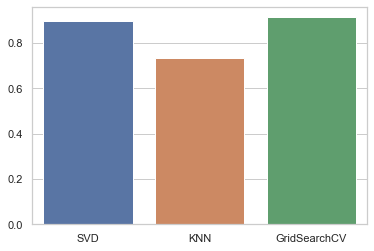

In [27]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=models, y=accur)

In [28]:
col_idx = rating_crosstab.columns.get_loc("Jurassic Park (1993)")

corr_specific = corr_matrix[col_idx]

pd.DataFrame({'corr_specific': corr_specific, 'Movies': rating_crosstab.columns})\
    .sort_values('corr_specific', ascending=False)\
    .head(10)
#####################################################################

,corr_specific,Movies
4656,1.000000,Jurassic Park (1993)
829,0.987646,Batman (1989)
8947,0.975182,True Lies (1994)
7908,0.972973,Speed (1994)
4331,0.971110,Independence Day (a.k.a. ID4) (1996)
5705,0.964891,Mission: Impossible (1996)
8359,0.963661,Terminator 2: Judgment Day (1991)
3522,0.963176,GoldenEye (1995)
5482,0.962586,"Mask, The (1994)"
3272,0.960650,"Fugitive, The (1993)"


In [29]:
col_idx = rating_crosstab.columns.get_loc("Balto (1995)")

corr_specific = corr_matrix[col_idx]

pd.DataFrame({'corr_specific': corr_specific, 'Movies': rating_crosstab.columns})\
    .sort_values('corr_specific', ascending=False)\
    .head(10)


,corr_specific,Movies
778,1.000000,Balto (1995)
6906,0.911048,Quest for Camelot (1998)
4125,0.880577,"Hunchback of Notre Dame, The (1996)"
292,0.876424,Aladdin and the King of Thieves (1996)
7801,0.862222,Snow White and the Seven Dwarfs (1937)
2890,0.843662,FairyTale: A True Story (1997)
4127,0.843662,"Hunt For Gollum, The (2009)"
4925,0.843662,"Last Legion, The (2007)"
5590,0.843662,Merlin (1998)
9703,0.843662,Zoom (2006)


In [30]:
col_idx = rating_crosstab.columns.get_loc("Stalag 17 (1953)")

corr_specific = corr_matrix[col_idx]

pd.DataFrame({'corr_specific': corr_specific, 'Movies': rating_crosstab.columns})\
    .sort_values('corr_specific', ascending=False)\
    .head(10)


,corr_specific,Movies
7964,1.000000,Stalag 17 (1953)
8757,0.955440,"Time Machine, The (1960)"
6579,0.932743,Peter's Friends (1992)
6190,0.922514,Nothing to Lose (1997)
9455,0.918555,"Widow of St. Pierre, The (Veuve de Saint-Pierr..."
184,0.918338,About Schmidt (2002)
3140,0.911314,Forbidden Planet (1956)
2217,0.910526,Dead Again (1991)
1365,0.910520,"Bridge on the River Kwai, The (1957)"
4690,0.907771,"Karate Kid, Part III, The (1989)"


In [31]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
data.df

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0
...,...,...,...
99999,671,6268,2.5
100000,671,6269,4.0
100001,671,6365,4.0
100002,671,6385,2.5
